<a href="https://colab.research.google.com/github/ommore1212/Exploratory-Data-Analysis-Part-2./blob/main/Exploratory_Data_Analysis_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [64]:
df = pd.read_csv('/content/drive/MyDrive/Projects /Exploratory Data Analysis/50_Startups.csv')

In [65]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [66]:
df_test = df[["State",'R&D Spend','Profit']]

In [67]:
df_test.head()

,State,R&D Spend,Profit
0,New York,165349.20,192261.83
1,California,162597.70,191792.06
2,Florida,153441.51,191050.39
3,New York,144372.41,182901.99
4,Florida,142107.34,166187.94


In [68]:
df_grp = df_test.groupby(["State",'R&D Spend','Profit'],as_index=False).mean()

In [69]:
df_grp

,State,R&D Spend,Profit
0,California,0.00,14681.40
1,California,0.00,42559.73
2,California,22177.74,65200.33
3,California,23640.93,71498.49
4,California,28754.33,78239.91
5,California,38558.51,81005.76
6,California,44069.95,89949.14
7,California,46426.07,96712.80
8,California,63408.86,97427.84
9,California,64664.71,107404.34


In [70]:
df_grp = df_grp.drop_duplicates(subset=['State', 'R&D Spend'])
df_pivot = df_grp.pivot(index='State', columns='R&D Spend')


In [71]:
df_pivot

Profit                                                    \
R&D Spend  0.00      542.05    1000.23   1315.46   15505.73  20229.59    
State                                                                    
California   14681.4       NaN       NaN       NaN       NaN       NaN   
Florida          NaN       NaN       NaN  49490.75       NaN       NaN   
New York         NaN  35673.41  64926.08       NaN  69758.98  81229.06   

                                                    ...                        \
R&D Spend  22177.74  23640.93  27892.92  28663.76   ...  120542.52  123334.88   
State                                               ...                         
California  65200.33  71498.49       NaN       NaN  ...        NaN  149759.96   
Florida          NaN       NaN  77798.83  90708.19  ...        NaN        NaN   
New York         NaN       NaN       NaN       NaN  ...  152211.77        NaN   

                                                                             \
R&D Spend  130298.13  131876.90  134615.46  142107.34  144372.41  153441.51   
State                                                                         
California       NaN        NaN  156122.51        NaN        NaN        NaN   
Florida     155752.6        NaN        NaN  166187.94        NaN  191050.39   
New York         NaN  156991.12        NaN        NaN  182901.99        NaN   

                                  
R&D Spend   162597.70  165349.20  
State                             
California  191792.06        NaN  
Florida           NaN        NaN  
New York          NaN  192261.83  

[3 rows x 49 columns]

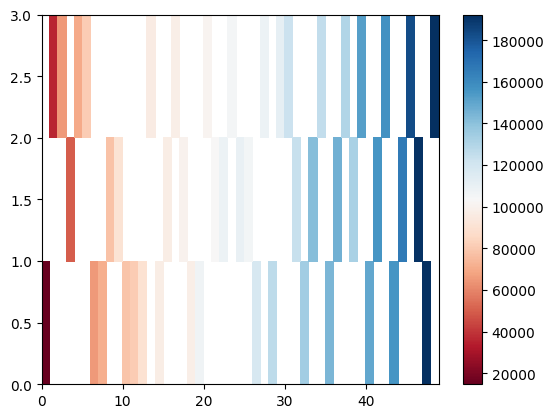

In [72]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()

In [78]:
df_anova = df[["State",'Profit']]
grouped_anova = df_anova.groupby('State')

anova_result = stats.f_oneway(grouped_anova.get_group('New York')['Profit'],
                              grouped_anova.get_group('Florida')['Profit'])

In [80]:
anova_result

F_onewayResult(statistic=np.float64(0.13955205498591913), pvalue=np.float64(0.7112694091634706))

(0.0, 205021.6265869106)

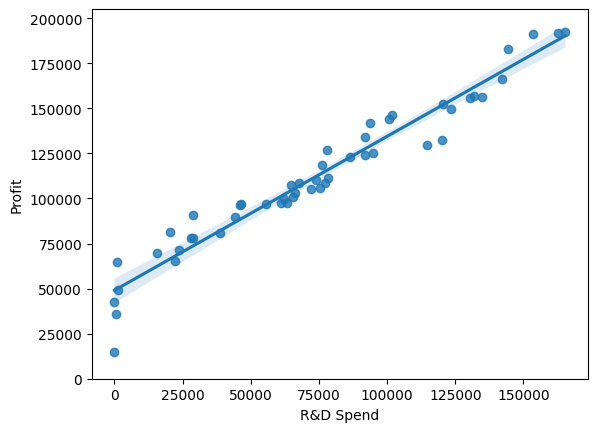

In [82]:
sns.regplot(x='R&D Spend', y='Profit', data=df)
plt.ylim(0)

In [84]:
parsons_coef , p_value = stats . pearsonr(df['R&D Spend'], df['Profit'])

np.float64(0.972900465659483)

In [88]:
print(parsons_coef)
print(p_value)

0.972900465659483
3.5003222436906e-32
